This notebook consists EDA for iris dataset . I hope it will be helpful for ultimate machine learning beginer . I will try to show eveything step by step.

Importing different python libraries !

In [48]:
import os  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Checking current working directory!

cwd = os.getcwd()
print("Your current working directory is : " , cwd)

Your current working directory is :  C:\Users\asus\MyJupyter\01c_LAB_EDA


In [9]:
#Importing Data using pandas & read_csv

filepath = "data/iris_data.csv"
df = pd.read_csv(filepath)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [21]:
# Number of rows or shape
print(df.shape[0])

# Column names of dataset
print(df.columns.tolist())

# Data types of the columns
print(df.dtypes)

150
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [22]:
#Count each species
df.species.value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

In [32]:
status_df = df.describe()
status_df.loc['range'] = status_df.loc['max'] - status_df.loc['max']
column_new = ['mean','25%','50%','75%','max','range']
status_df = status_df.loc[column_new]
#status_df = status_df.rename({'75%':'median'},inplace=True)
status_df

,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
max,7.900000,4.400,6.900000,2.500000
range,0.000000,0.000,0.000000,0.000000


In [34]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [35]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [36]:
df.groupby('species').agg(['mean','median'])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [37]:
df.groupby('species').agg([np.mean,np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [40]:
#Drawing plot using matplotlib for sepal width vs Sepal width
%matplotlib inline


<ipython-input-42-148b39764397>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xlabel='Sepal Length (cm)' , ylabel='Sepal width (cm)' , Title='Sepal Length vs Sepal Width');


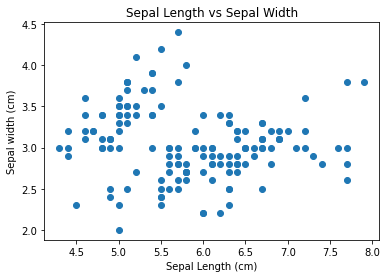

In [42]:
ax = plt.axes()
ax.scatter(df.sepal_length , df.sepal_width)
ax.set(xlabel='Sepal Length (cm)' , ylabel='Sepal width (cm)' , Title='Sepal Length vs Sepal Width');

[Text(0.5, 0, 'Sepal Width in cm'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Distribution of Sepal width')]

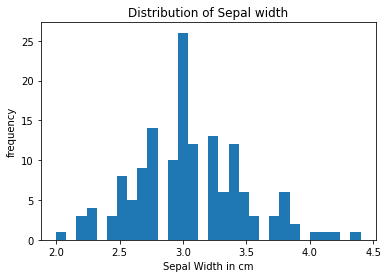

In [44]:
#Histogram for sepal width , sepal length , petal width , petal length

sepal_w=plt.axes()
sepal_w.hist(df.sepal_width , bins = 30)
sepal_w.set(xlabel='Sepal Width in cm', ylabel='frequency',title='Distribution of Sepal width')


[Text(0.5, 0, 'Sepal Length in cm'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Distribution of Sepal Length')]

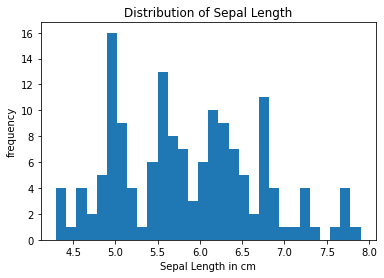

In [45]:
sepal_l=plt.axes()
sepal_l.hist(df.sepal_length , bins = 30)
sepal_l.set(xlabel='Sepal Length in cm', ylabel='frequency',title='Distribution of Sepal Length')


[Text(0.5, 0, 'Petal Width in cm'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Distribution of Petal width')]

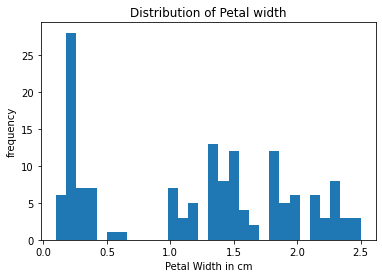

In [46]:
petal_w=plt.axes()
petal_w.hist(df.petal_width , bins = 30)
petal_w.set(xlabel='Petal Width in cm', ylabel='frequency',title='Distribution of Petal width')



[Text(0.5, 0, 'Petal Length in cm'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'Distribution of Petal Length')]

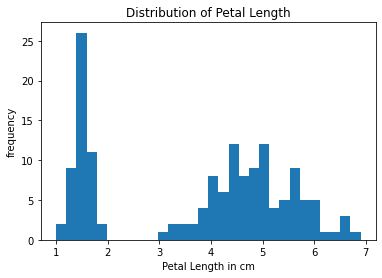

In [47]:
petal_l=plt.axes()
petal_l.hist(df.petal_length , bins = 30)
petal_l.set(xlabel='Petal Length in cm', ylabel='frequency',title='Distribution of Petal Length')

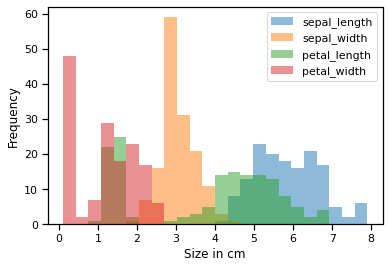

In [51]:
#Single Plot for all features!
sns.set_context('notebook')
ax=df.plot.hist(bins=24 , alpha = 0.5)
ax.set_xlabel('Size in cm');



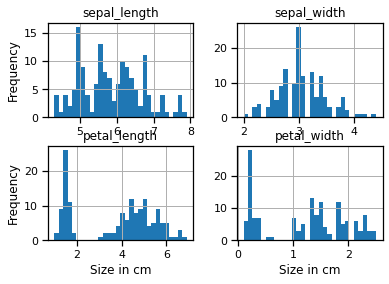

In [53]:
#Four Separate Plot
axList = df.hist(bins=30)

# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size in cm')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')

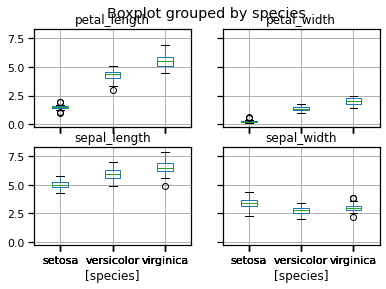

In [55]:
#Box Plotting
df.boxplot(by='species');

In [61]:
plot_data = (df 
            .set_index('species')
            .stack()
            .to_frame()
            .reset_index()
            .rename(columns={0:'size', 'level_1':'measurement'}))
plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


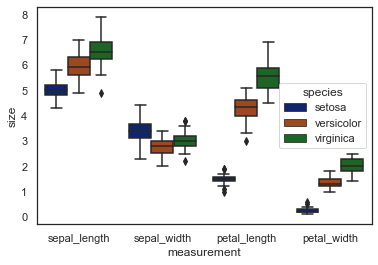

In [62]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

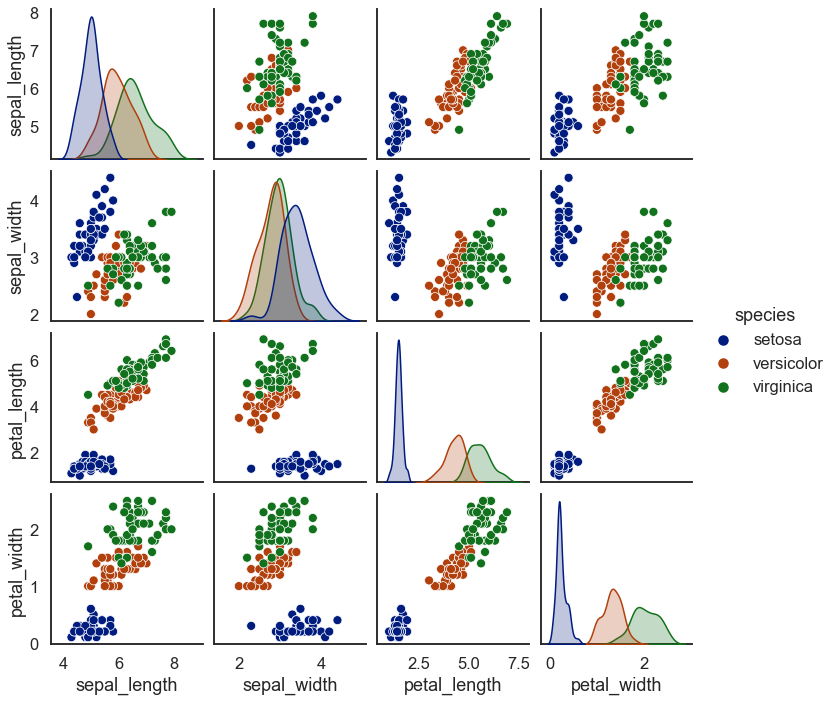

In [65]:
sns.set_context('talk')
sns.pairplot(df, hue='species');